### An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [732]:
# Getting the data
insurance = pd.read_csv('insurance_part2_data.csv')

In [3]:
# getting the copy of the original data
df = insurance.copy()

#### 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

#### Number of Observations and Features

In [6]:
insurance.shape
print('Number of observations:', insurance.shape[0])
print("")
print('Number of Features:', insurance.shape[1])

Number of observations: 3000

Number of Features: 10


In [7]:
insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [13]:
insurance.tail()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


In [12]:
# df.isnull().sum()

print('The total number of missing values found in the data set:')
insurance.isnull().sum()

The total number of missing values found in the data set:


Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [11]:
insurance.info()
# no missing values
# index not reset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [15]:
print('Number of duplicates in the data are',insurance.duplicated().sum())

Number of duplicates in the data are 139


#### Summary of all Numeric Columns:

In [16]:
insurance.describe().T
# One anamoly: Minimum Duration is -1

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


#### Summary of all Nominal Columns:

In [17]:
insurance.describe(include='object').T

,count,unique,top,freq
Agency_Code,3000,4,EPX,1365
Type,3000,2,Travel Agency,1837
Claimed,3000,2,No,2076
Channel,3000,2,Online,2954
Product Name,3000,5,Customised Plan,1136
Destination,3000,3,ASIA,2465


In [18]:
cat_col = insurance.select_dtypes('object')
num_col = insurance.select_dtypes(['int64','float64'])

In [19]:
list_col = insurance.columns
list_cat_col = cat_col.columns
list_num_col = num_col.columns

#### Co-efficient of Variance:

In [208]:
for i in list_num_col:
    print('The Coefficient of Variance for the column',i, 'is ',round((df[i].std()/df[i].mean())*100),'%')

The Coefficient of Variance for the column Age is  27 %
The Coefficient of Variance for the column Commision is  175 %
The Coefficient of Variance for the column Duration is  154 %
The Coefficient of Variance for the column Sales is  117 %


#### Skewness for all columns:


In [207]:
for i in list_num_col:
    print('Skewness for',i, ':',round(df[i].skew(),4))
    
# Duration is highly skewed due to an very high Outlier

Skewness for Age : 1.1497
Skewness for Commision : 3.1489
Skewness for Duration : 2.238
Skewness for Sales : 2.3811


#### Kurtosis for all the Columns:

In [209]:
for i in list_num_col:
    print('Kurtosis for',i, ':',round(df[i].kurtosis(),4))
    
    
# Duration has very high Kurtosis due to an very high Outlier

Kurtosis for Age : 1.6521
Kurtosis for Commision : 13.9848
Kurtosis for Duration : 3.6942
Kurtosis for Sales : 6.1552


#### Nominal column summary counts in Percentage

In [29]:
print('\033[1m','Unique counts of Nominal columns:','\033[0m')
print("")
for i in cat_col:
    print(pd.DataFrame(round(cat_col[i].value_counts(normalize=True)*100,2)))
    print("-----------------")
    print(" ")

 Unique counts of Nominal columns: 

     Agency_Code
EPX        45.50
C2B        30.80
CWT        15.73
JZI         7.97
-----------------
 
                Type
Travel Agency  61.23
Airlines       38.77
-----------------
 
     Claimed
No      69.2
Yes     30.8
-----------------
 
         Channel
Online     98.47
Offline     1.53
-----------------
 
                   Product Name
Customised Plan           37.87
Cancellation Plan         22.60
Bronze Plan               21.67
Silver Plan               14.23
Gold Plan                  3.63
-----------------
 
          Destination
ASIA            82.17
Americas        10.67
EUROPE           7.17
-----------------
 


#### Analysis of the Target Variable:


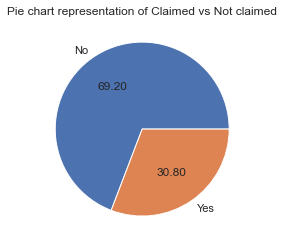

In [32]:
plt.title('Pie chart representation of Claimed vs Not claimed')
plt.pie(df['Claimed'].value_counts(normalize=True),autopct='%.2f',labels=df['Claimed'].value_counts().index);

#### Summary of Basic EDA
1. Anamoly in Duration Feature. Duration cannot be in negatives.
2. Very high outlier in Duration. The high duration period does not correspond with the Sales and Commission. 
3. No missing values.
4. No Unique ID or Customer Name are given in the data sets. Hence, the 139 records which reflected as duplicates is not treated as duplicates. Not treated as well.
5. No anamolies in Nominal columns

#### Outliers

<AxesSubplot:xlabel='Sales'>

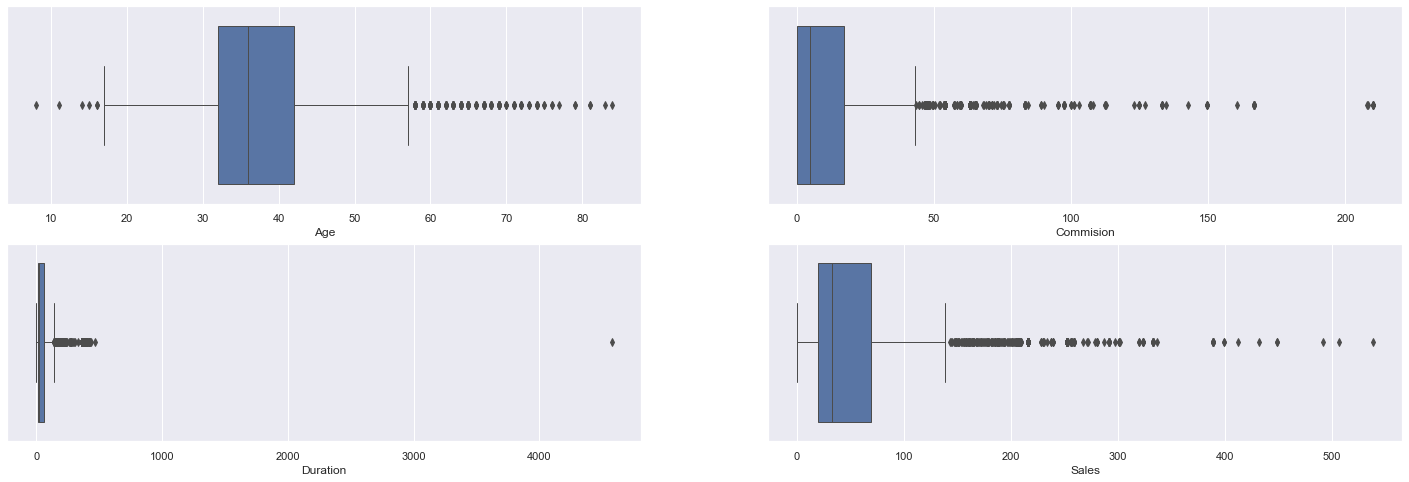

In [40]:
plt.figure(figsize=(25,8))
plt.subplot(2,2,1)
sns.boxplot(x=insurance['Age'],linewidth=1)

plt.subplot(2,2,2)
sns.boxplot(x=insurance['Commision'],linewidth=1)

plt.subplot(2,2,3)
sns.boxplot(x=insurance['Duration'],linewidth=1)

plt.subplot(2,2,4)
sns.boxplot(x=insurance['Sales'],linewidth=1)

In [41]:
# Function to calculate lower_range and upper_range
def Outlier_ur_lr(column):
    sorted(column)
    Q1,Q3=np.percentile(column,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [42]:
# The lower range and the upper range of all the numerical features calculated based on IQR

for i in num_col:
    print('Lower range and Upper range for ',i,':',Outlier_ur_lr(insurance[i]))

Lower range and Upper range for  Age : (17.0, 57.0)
Lower range and Upper range for  Commision : (-25.8525, 43.0875)
Lower range and Upper range for  Duration : (-67.0, 141.0)
Lower range and Upper range for  Sales : (-53.5, 142.5)


#### Checking the Proportion of Outliers:

In [50]:
# Age:

print('Percentage of Outliers less than the lower range in age: ',
      round((num_col[num_col['Age'] < 17].count()[0]/2999*100),4),'%')
print('Percentage of Outliers more than the upper range in age: ',
      round((num_col[num_col['Age'] > 57].count()[0]/2999*100),2),'%')

Percentage of Outliers less than the lower range in age:  0.2001 %
Percentage of Outliers more than the upper range in age:  6.6 %


In [65]:
# Commission:

print('Percentage of Outliers more than the upper range in Commission:',
      round((num_col[num_col['Commision'] > 43.0875].count()[0]/2999*100),2),'%')

Percentage of Outliers more than the upper range in Commission: 12.07 %


In [54]:
# Sales:

print('Percentage of Outliers more than the upper range in Sales :',
      round((num_col[num_col['Sales'] > 142.5].count()[0]/2999*100),2),'%')

Percentage of Outliers more than the upper range in Sales : 11.77 %


In [59]:
# Duration:

insurance[insurance['Duration'] < 0] #imputed with 1

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1508,25,JZI,Airlines,No,6.3,Online,-1,18.0,Bronze Plan,ASIA


In [57]:
df['Duration'] = df['Duration'].replace(to_replace=-1,value=1)

In [58]:
insurance[insurance['Duration'] > 500 ] #imputed with the upper range of the outlier

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2845,48,C2B,Airlines,No,0.09,Online,4580,0.32,Customised Plan,ASIA


In [61]:
num_col = df.select_dtypes(['int64','float64'])

In [64]:
df['Duration'] = df['Duration'].replace(to_replace=4580,value=141)

print('Percentage of Outliers more than the upper range in Duration column :',
      round((num_col[num_col['Duration'] > 141].count()[0]/2999*100),2),'%')

Percentage of Outliers more than the upper range in Duration column : 12.7 %


<AxesSubplot:xlabel='Sales'>

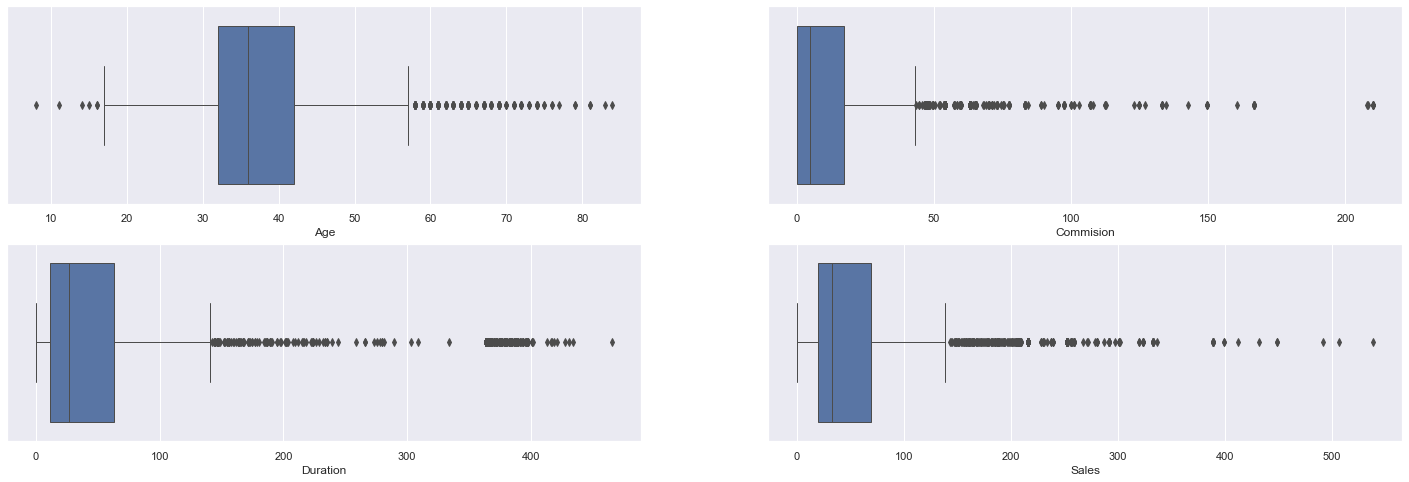

In [67]:
plt.figure(figsize=(25,8))
plt.subplot(2,2,1)
sns.boxplot(x=df['Age'],linewidth=1)

plt.subplot(2,2,2)
sns.boxplot(x=df['Commision'],linewidth=1)

plt.subplot(2,2,3)
sns.boxplot(x=df['Duration'],linewidth=1)

plt.subplot(2,2,4)
sns.boxplot(x=df['Sales'],linewidth=1)

#### Summary on Outliers:

1. An extreme outlier in the Duration column is treated.
2. Percentage of Outliers in all other numeric columns are below 13%.
3. The given data is about an Insurance claim, we may have many unique scenarios. Treating the outliers may generalize them.
4. Also, CART Model and Random models are capable of handling Outliers.
5. Hence, Original data without any treatment on outliers is used for further modelling. 
6. The given data is also analysed by treating outliers. There is no strong significant difference between both the data sets. The comparison will be shown towards the end of the report. 

#### Univariate Analysis of Numeric Columns and Nominal Columns:

In [68]:
def Univariate_analysis_num(column,bins):
    
    plt.figure(figsize=(15,3))
    plt.subplot(1,2,1)
    print(" ")
    print('\033[1m',"Histogram and Boxplot for the " +column,"column",'\033[0m')
    
    sns.histplot(num_col[column],kde=True,color='k',bins=20)
    plt.subplot(1,2,2)
    sns.boxplot(x=num_col[column],color='r',saturation=2,whis=2,linewidth=2)
    plt.show()

 
 Histogram and Boxplot for the Age column 


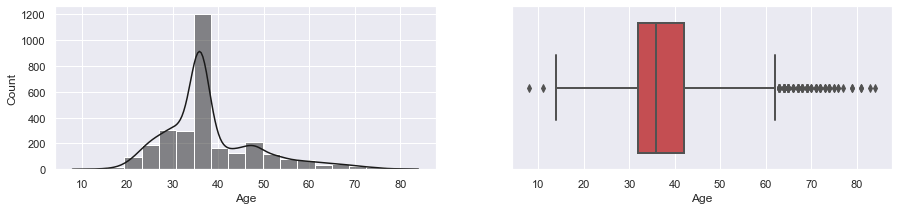

 
 Histogram and Boxplot for the Commision column 


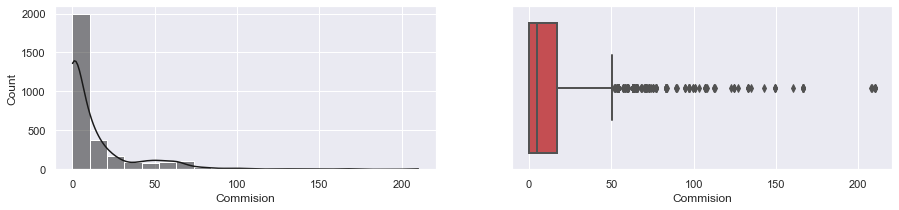

 
 Histogram and Boxplot for the Duration column 


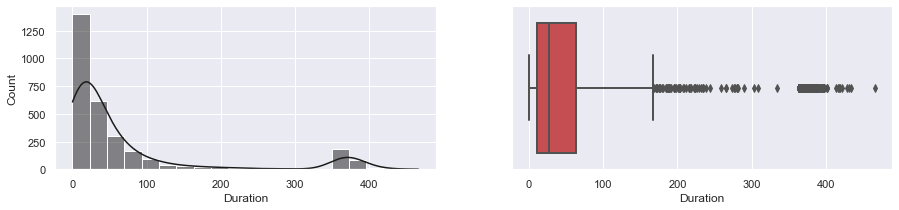

 
 Histogram and Boxplot for the Sales column 


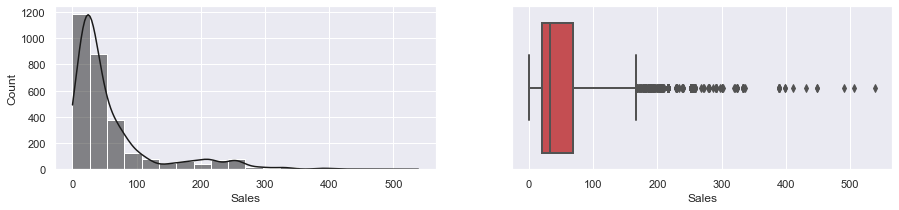

In [69]:
for i in list_num_col:
    Univariate_analysis_num(i,20)

In [735]:
def Univariate_analysis_cat(column):
    plt.figure(figsize=(25,5))
    plt.subplot(1,2,1)
    print(" ")
    print('\033[1m',"Pie-plot and Count-plot for the " +column,"column",'\033[0m')
    plt.pie(cat_col[column].value_counts(),autopct='%.f',labels = cat_col[column].value_counts().index)
    plt.xlabel(column)
    
    plt.subplot(1,2,2)
    sns.countplot(y=df[column],saturation=.70)
    plt.show()

 
 Pie-plot and Count-plot for the Agency_Code column 


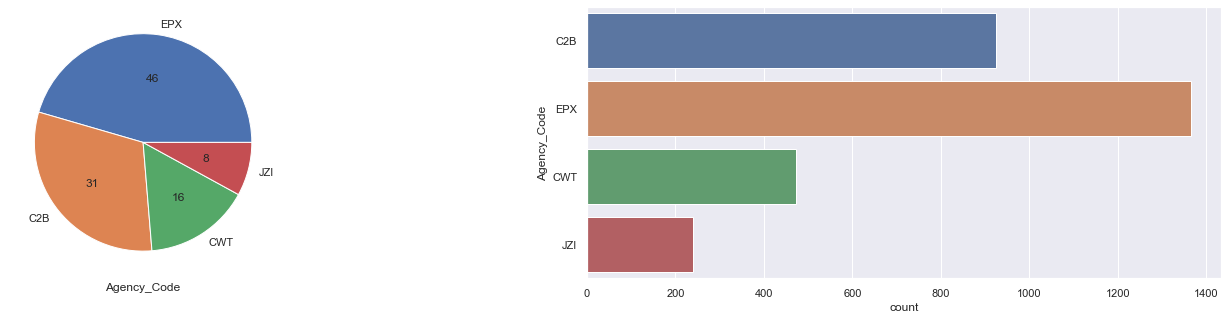

 
 Pie-plot and Count-plot for the Type column 


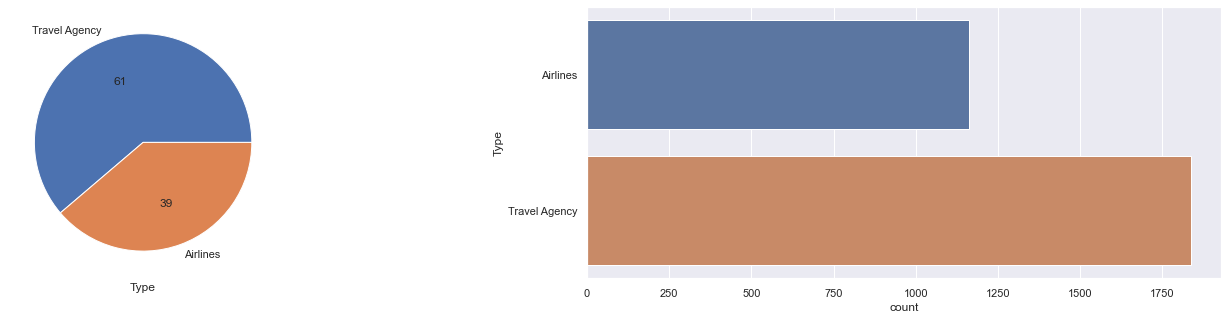

 
 Pie-plot and Count-plot for the Claimed column 


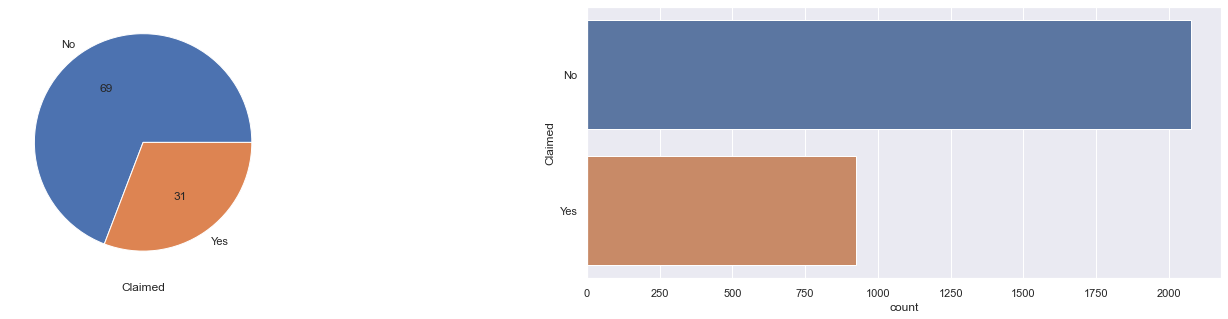

 
 Pie-plot and Count-plot for the Channel column 


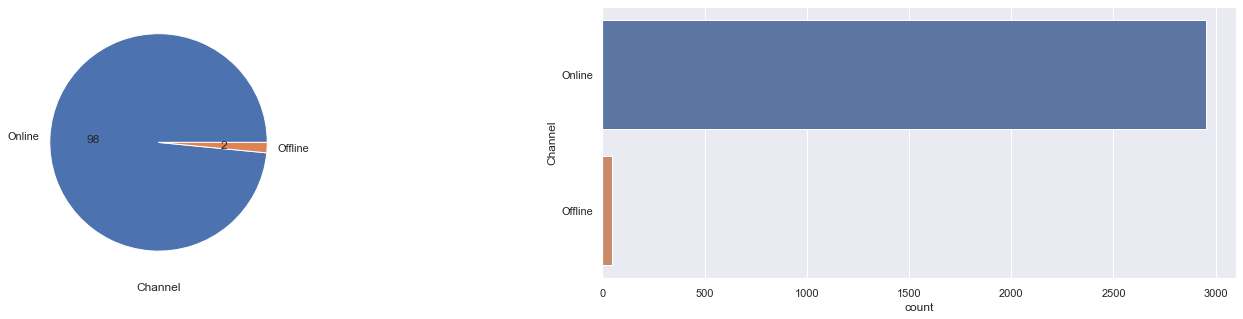

 
 Pie-plot and Count-plot for the Product Name column 


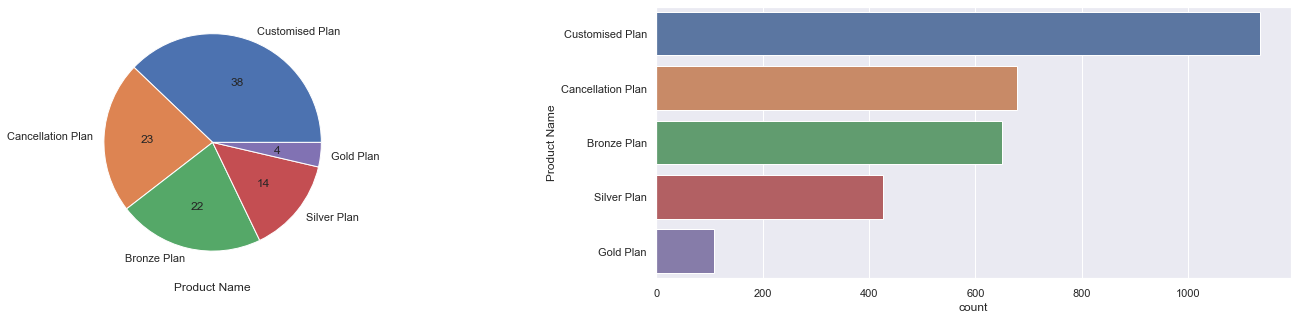

 
 Pie-plot and Count-plot for the Destination column 


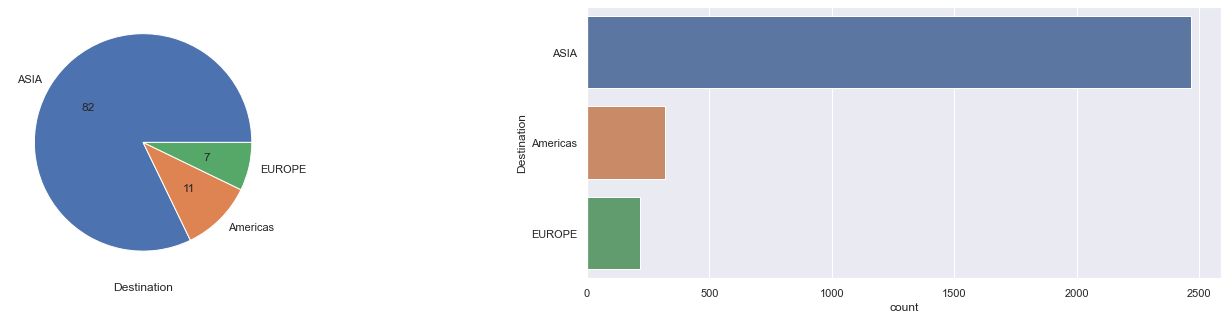

In [736]:
for i in list_cat_col:
    Univariate_analysis_cat(i)

#### Bi-variate Analysis: (Numeric columns)

<Figure size 1440x720 with 0 Axes>

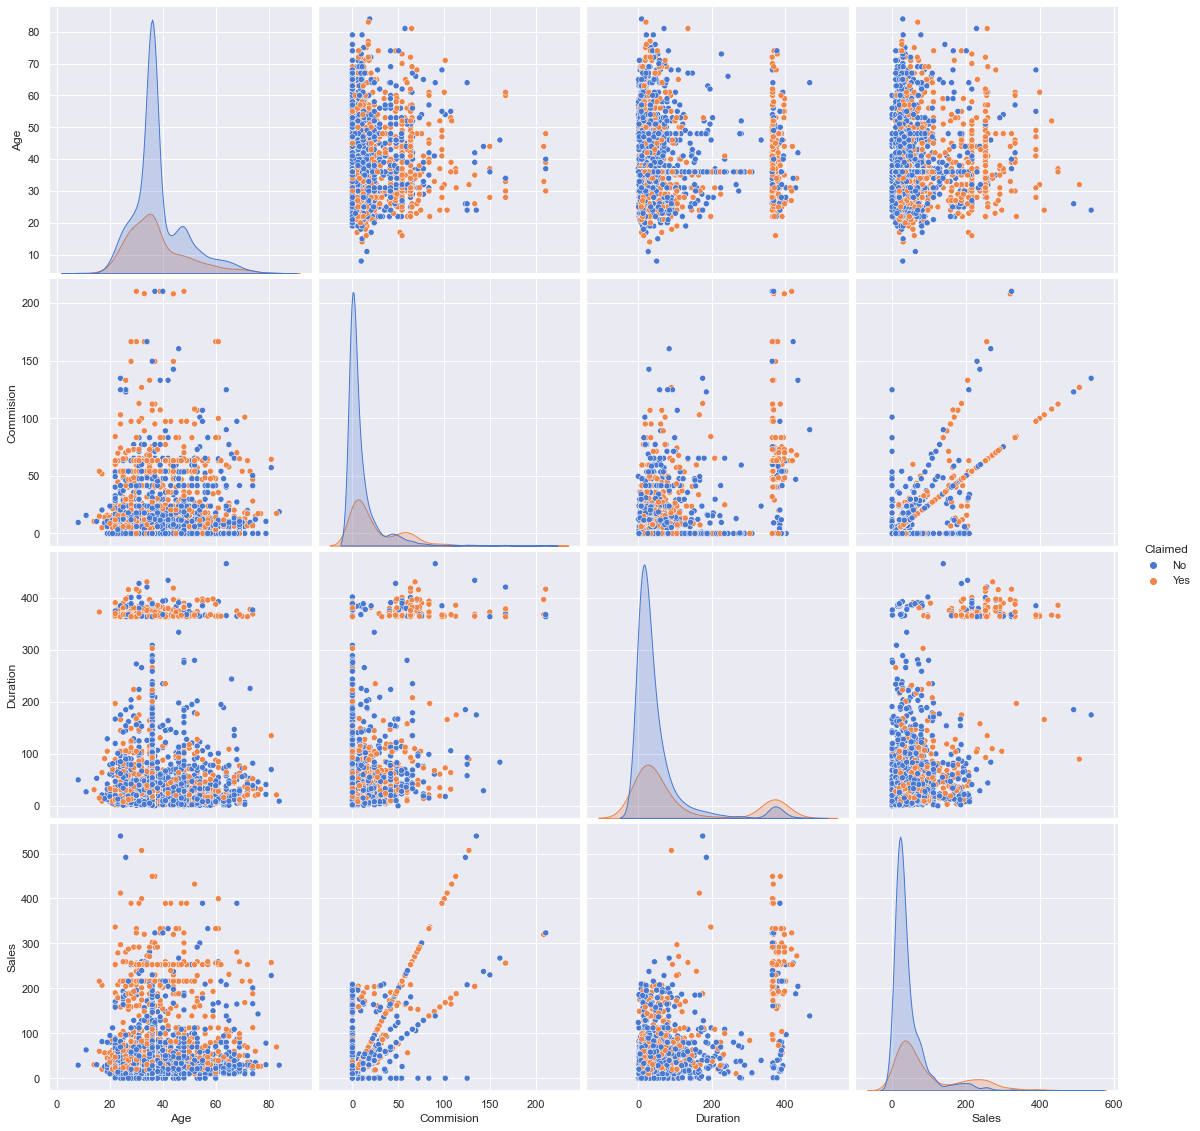

In [740]:
# Pair plot
plt.figure(figsize=(20,10))
sns.pairplot(data = df,hue='Claimed',height=4,palette='muted');

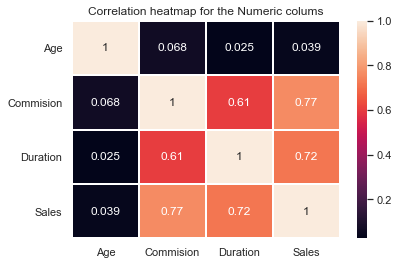

In [74]:
# Correlations Heatmap:

sns.heatmap(num_col.corr(),annot=True,linewidths=1)
plt.title('Correlation heatmap for the Numeric colums')
plt.show()

#### Multi-variate Analysis:

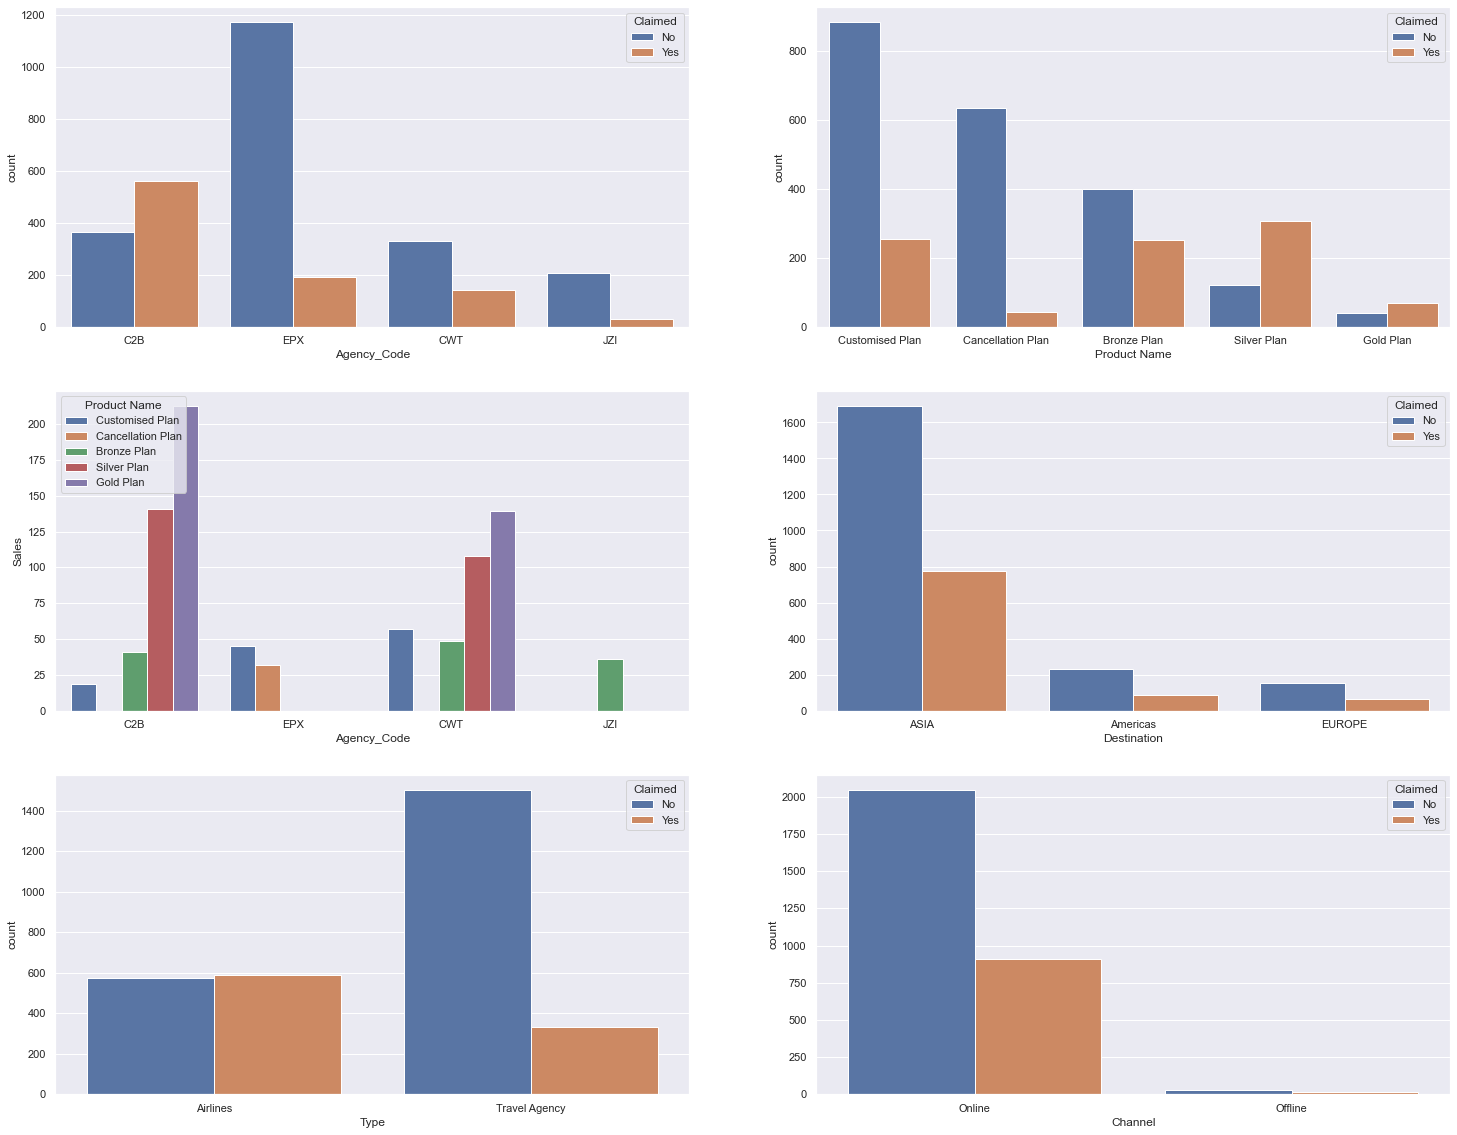

In [747]:
plt.figure(figsize=(25,20))

plt.subplot(3,2,1)
sns.countplot(x=df['Agency_Code'],hue=df['Claimed'])
plt.subplot(3,2,2)
sns.countplot(x=df['Product Name'],hue=df['Claimed'])

plt.subplot(3,2,3)
sns.barplot(x='Agency_Code',y='Sales',hue='Product Name',data=df,ci=None)

plt.subplot(3,2,4)
sns.countplot(x=df['Destination'],hue=df['Claimed'])

plt.subplot(3,2,5)
sns.countplot(x=df['Type'],hue=df['Claimed'])

plt.subplot(3,2,6)
sns.countplot(x=df['Channel'],hue=df['Claimed'])

plt.show()

In [76]:
# Getting a copy of the edited data
df_model = df.copy()

In [77]:
df_model['Type'] = pd.Categorical(df_model['Type']).codes
df_model['Claimed'] = pd.Categorical(df_model['Claimed']).codes
df_model['Channel'] = pd.Categorical(df_model['Channel']).codes

In [78]:
Agency_Code = pd.get_dummies(df_model['Agency_Code'],drop_first=True)
Product_Name = pd.get_dummies(df_model['Product Name'],drop_first=True)
Destination = pd.get_dummies(df_model['Destination'],drop_first=True)

In [79]:
df_model=pd.concat((df_model.drop(['Agency_Code','Product Name','Destination'],
                                  axis=1),Agency_Code,Product_Name,Destination),axis=1)

In [80]:
# checking the data set newly formed with revised dtypes
df_model.head()

,Age,Type,Claimed,Commision,Channel,Duration,Sales,CWT,EPX,JZI,Cancellation Plan,Customised Plan,Gold Plan,Silver Plan,Americas,EUROPE
0,48,0,0,0.70,1,7,2.51,0,0,0,0,1,0,0,0,0
1,36,1,0,0.00,1,34,20.00,0,1,0,0,1,0,0,0,0
2,39,1,0,5.94,1,3,9.90,1,0,0,0,1,0,0,1,0
3,36,1,0,0.00,1,4,26.00,0,1,0,1,0,0,0,0,0
4,33,0,0,6.30,1,53,18.00,0,0,1,0,0,0,0,0,0


In [470]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

#### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

#### Data Split : Train 80% and Test 20%

In [472]:
X = df_model.drop(['Claimed'],axis=1)

y = df_model['Claimed']

In [473]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20, random_state=123)

#### Dimentions of the Train and Test data:

In [474]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',y_train.shape)
print('test_labels',y_test.shape)

X_train (2400, 15)
X_test (600, 15)
train_labels (2400,)
test_labels (600,)


#### Building a Decision Tree Classifier / CART Model

In [475]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [7,8,9],#10,15,20
    'min_samples_leaf': [10,20,30], #10,20
    'min_samples_split': [60,80,100]#30,60
}

DTC = DecisionTreeClassifier(random_state=123)

Grid_search_DTC = GridSearchCV(estimator = DTC, param_grid = param_grid, cv = 3)

In [476]:
Grid_search_DTC.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['gini'], 'max_depth': [7, 8, 9],
                         'min_samples_leaf': [10, 20, 30],
                         'min_samples_split': [60, 80, 100]})

In [477]:
# best params for DTC
Grid_search_DTC.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 30,
 'min_samples_split': 60}

In [478]:
# Best estimator for DTC
Best_grid_DTC = Grid_search_DTC.best_estimator_

In [479]:
# CART
y_train_pre_DT = Best_grid_DTC.predict(X_train)

y_test_pre_DT = Best_grid_DTC.predict(X_test)

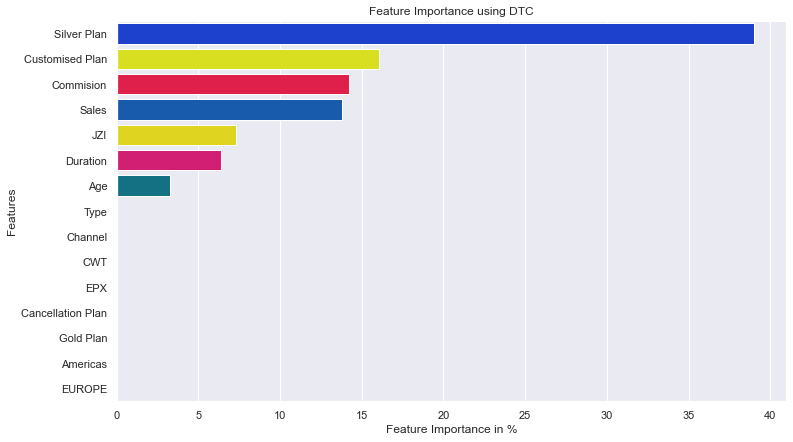

In [480]:
# Feature Importance:
x=pd.DataFrame(Best_grid_DTC.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x=x[0],y=x.index,palette='prism')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using DTC')
plt.show()

#### Building a Random Forest Classifier

In [481]:
param_grid = {
    'max_depth': [15],## 7,8,9,10
    'max_features': [15],## 10,11,12
    'min_samples_leaf': [10,20,30],# 20,30
    'min_samples_split': [40,60,80], ## 60,70
    'n_estimators': [100,300] ## 100,200
}

RFCL = RandomForestClassifier(random_state=123)

Grid_search_RFCL = GridSearchCV(estimator = RFCL, param_grid = param_grid, cv = 3)

In [482]:
Grid_search_RFCL.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_depth': [15], 'max_features': [15],
                         'min_samples_leaf': [10, 20, 30],
                         'min_samples_split': [40, 60, 80],
                         'n_estimators': [100, 300]})

In [483]:
# Getting best params for RF:

Grid_search_RFCL.best_params_

{'max_depth': 15,
 'max_features': 15,
 'min_samples_leaf': 10,
 'min_samples_split': 40,
 'n_estimators': 300}

In [484]:
Best_grid_RFCL = Grid_search_RFCL.best_estimator_

In [485]:
# RF
y_train_pre_RF = Best_grid_RFCL.predict(X_train)

y_test_pre_RF = Best_grid_RFCL.predict(X_test)

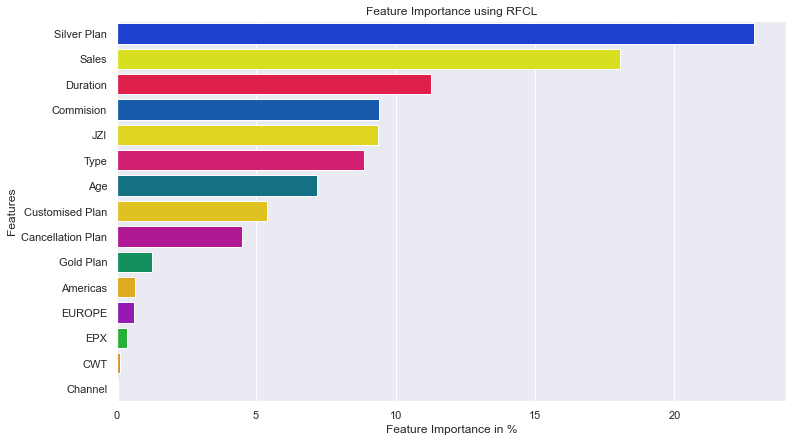

In [486]:
# Feature Importance:
x1=pd.DataFrame(Best_grid_RFCL.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x=x1[0],y=x1.index,palette='prism')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RFCL')
plt.show()

#### Building a Neural Network Classifier

In [487]:
# Scaling:

sc = StandardScaler()

In [488]:
X_train_scaled = sc.fit_transform(X_train)

In [727]:
# the scaling properties of X_train are tranformed to X_test.
X_test_scaled = sc.transform(X_test)

In [490]:
param_grid = {
    'hidden_layer_sizes':  [(100,100,100)], # 50, 200
    'max_iter': [1000], #5000,2500
    'solver': ['adam'],#sgd
    'activation':['relu'],#tanh,sigmoid | Relu fits for hidden layers
    'alpha':[0.05], 
    'learning_rate': ['adaptive'],#adpative
    'batch_size':[500],
    'tol': [0.0001] 
}

NNCL = MLPClassifier(random_state=123)

Grid_search_NNCL = GridSearchCV(estimator = NNCL, param_grid = param_grid, cv = 3)

In [491]:
Grid_search_NNCL.fit(X_train_scaled,y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=123),
             param_grid={'activation': ['relu'], 'alpha': [0.05],
                         'batch_size': [500],
                         'hidden_layer_sizes': [(100, 100, 100)],
                         'learning_rate': ['adaptive'], 'max_iter': [1000],
                         'solver': ['adam'], 'tol': [0.0001]})

In [492]:
Grid_search_NNCL.best_params_

{'activation': 'relu',
 'alpha': 0.05,
 'batch_size': 500,
 'hidden_layer_sizes': (100, 100, 100),
 'learning_rate': 'adaptive',
 'max_iter': 1000,
 'solver': 'adam',
 'tol': 0.0001}

In [493]:
Best_grid_NNCL = Grid_search_NNCL.best_estimator_

In [494]:
# NN
y_train_pre_NN = Best_grid_NNCL.predict(X_train_scaled)
    
y_test_pre_NN = Best_grid_NNCL.predict(X_test_scaled)

##### **Cannot compute Feature importance in Neural networks:

#### 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

#### Accuracy, Confusion Matrix and Classification report for CART and RF

Note: Neural networks is performed on Scaled data. so not inclucled here.

In [495]:
Models=[Best_grid_DTC,Best_grid_RFCL]

DT_Model_name = {Best_grid_DTC:'DecisionTreeClassifier',Best_grid_RFCL:'RandomForestClassifier',Best_grid_NNCL:'ArtificialNeuralNetwork'}

  Evaluation of Performance for all Models on Training Data 


 Accuracy for DecisionTreeClassifier model is  79.75 %


 Classification report for DecisionTreeClassifier model is  
               precision    recall  f1-score   support

           0       0.84      0.87      0.86      1655
           1       0.69      0.64      0.66       745

    accuracy                           0.80      2400
   macro avg       0.76      0.75      0.76      2400
weighted avg       0.79      0.80      0.80      2400



 Confusion Matrix for DecisionTreeClassifier model is


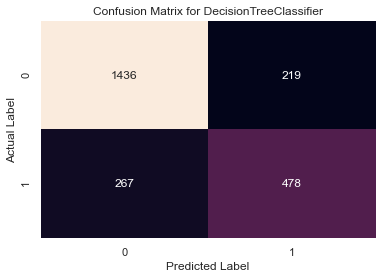

 Accuracy for RandomForestClassifier model is  82.17 %


 Classification report for RandomForestClassifier model is  
               precision    recall  f1-score   support

           0       0.84      0.91      0.88      1655
           1       0.76      0.63      0.69       745

    accuracy                           0.82      2400
   macro avg       0.80      0.77      0.78      2400
weighted avg       0.82      0.82      0.82      2400



 Confusion Matrix for RandomForestClassifier model is


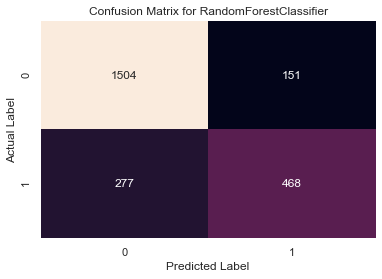

In [496]:
print('\033[1m'," Evaluation of Performance for all Models on Training Data",'\033[0m')
print('\n')
for i in Models:
    i.fit(X_train,y_train)
    print('\033[1m','Accuracy for {} model is'.format(DT_Model_name[i]),'\033[0m',  round((accuracy_score(y_train,i.predict(X_train))*100),2),'%')
    print('\n')
    print('\033[1m','Classification report for {} model is'.format(DT_Model_name[i]),'\033[0m','\n',classification_report(y_train,i.predict(X_train)))
    print('\n')
    print('\033[1m','Confusion Matrix for {} model is'.format(DT_Model_name[i])),'\033[0m'
    sns.heatmap(confusion_matrix(y_train,i.predict(X_train)),annot=True,fmt='d',cbar=False)
    plt.title('Confusion Matrix for {}'.format(DT_Model_name[i]))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

  Evaluation of Performance for all Models on Testing Data 


 Accuracy for DecisionTreeClassifier model is  75.5 %


 Classification report for DecisionTreeClassifier model is  
               precision    recall  f1-score   support

           0       0.82      0.83      0.83       421
           1       0.59      0.58      0.59       179

    accuracy                           0.76       600
   macro avg       0.71      0.70      0.71       600
weighted avg       0.75      0.76      0.75       600



 Confusion Matrix for DecisionTreeClassifier model is


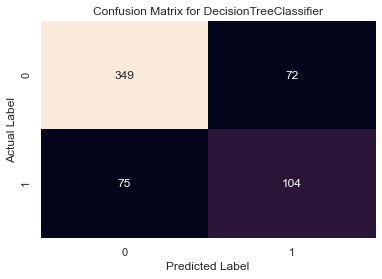

 Accuracy for RandomForestClassifier model is  78.33 %


 Classification report for RandomForestClassifier model is  
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       421
           1       0.66      0.56      0.61       179

    accuracy                           0.78       600
   macro avg       0.74      0.72      0.73       600
weighted avg       0.78      0.78      0.78       600



 Confusion Matrix for RandomForestClassifier model is


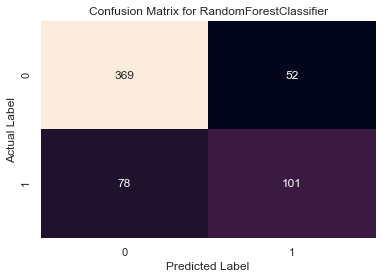

In [497]:
print('\033[1m'," Evaluation of Performance for all Models on Testing Data",'\033[0m')
print('\n')
for i in Models:
    i.fit(X_train,y_train)
    print('\033[1m','Accuracy for {} model is'.format(DT_Model_name[i]),'\033[0m',  round((accuracy_score(y_test,i.predict(X_test))*100),2),'%')
    print('\n')
    print('\033[1m','Classification report for {} model is'.format(DT_Model_name[i]),'\033[0m','\n',classification_report(y_test,i.predict(X_test)))
    print('\n')
    print('\033[1m','Confusion Matrix for {} model is'.format(DT_Model_name[i])),'\033[0m'
    sns.heatmap(confusion_matrix(y_test,i.predict(X_test)),annot=True,fmt='d',cbar=False)
    plt.title('Confusion Matrix for {}'.format(DT_Model_name[i]))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

#### NN Model Performance - Training Data

 Accuracy Score for Artificial Neural Network model is  85.08 %

 Classification report for Artificial Neural Network model is  
 
               precision    recall  f1-score   support

           0       0.89      0.90      0.89      1655
           1       0.77      0.75      0.76       745

    accuracy                           0.85      2400
   macro avg       0.83      0.82      0.82      2400
weighted avg       0.85      0.85      0.85      2400


 Confusion Matrix for Artificial Neural Network model is  AxesSubplot(0.125,0.125;0.775x0.755)


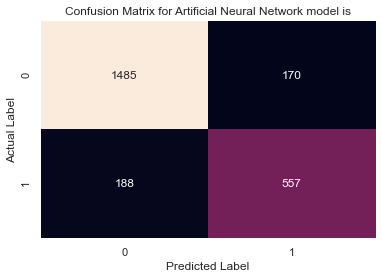

In [498]:
# Train:

DT_Model_name = {Best_grid_NNCL:'Artificial Neural Network'}

print('\033[1m','Accuracy Score for {} model is'.format(DT_Model_name[Best_grid_NNCL]),'\033[0m',
      round((accuracy_score(y_train,y_train_pre_NN)*100),2),'%')
print("")

print('\033[1m','Classification report for {} model is'. format(DT_Model_name[Best_grid_NNCL]),'\033[0m','\n','\n',
     classification_report(y_train,y_train_pre_NN))
print("")

print('\033[1m','Confusion Matrix for {} model is'. format(DT_Model_name[Best_grid_NNCL]),'\033[0m',
     sns.heatmap(confusion_matrix(y_train,y_train_pre_NN),annot=True, fmt='d',cbar=False));
plt.title('Confusion Matrix for {} model is'. format(DT_Model_name[Best_grid_NNCL]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

plt.show()

#### NN Model Performance - Test Data

 Accuracy Score for Artificial Neural Network model is  76.83 %

 Classification report for Artificial Neural Network model is  
 
               precision    recall  f1-score   support

           0       0.83      0.84      0.84       421
           1       0.61      0.60      0.61       179

    accuracy                           0.77       600
   macro avg       0.72      0.72      0.72       600
weighted avg       0.77      0.77      0.77       600


 Confusion Matrix for Artificial Neural Network model is  AxesSubplot(0.125,0.125;0.775x0.755)


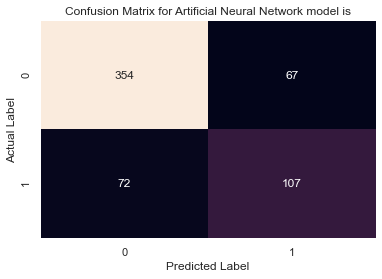

In [499]:
# Test:

DT_Model_name = {Best_grid_NNCL:'Artificial Neural Network'}

print('\033[1m','Accuracy Score for {} model is'.format(DT_Model_name[Best_grid_NNCL]),'\033[0m',
      round((accuracy_score(y_test,y_test_pre_NN)*100),2),'%')
print("")

print('\033[1m','Classification report for {} model is'. format(DT_Model_name[Best_grid_NNCL]),'\033[0m','\n','\n',
     classification_report(y_test,y_test_pre_NN))
print("")

print('\033[1m','Confusion Matrix for {} model is'. format(DT_Model_name[Best_grid_NNCL]),'\033[0m',
     sns.heatmap(confusion_matrix(y_test,y_test_pre_NN),annot=True, fmt='d',cbar=False));
plt.title('Confusion Matrix for {} model is'. format(DT_Model_name[Best_grid_NNCL]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

plt.show()

#### 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

In [500]:
AUC_train_Dt = roc_auc_score(y_train,Best_grid_DTC.predict_proba(X_train)[:,1])
AUC_train_Rf = roc_auc_score(y_train,Best_grid_RFCL.predict_proba(X_train)[:,1])
AUC_train_Nn = roc_auc_score(y_train,Best_grid_NNCL.predict_proba(X_train_scaled)[:,1])

Area under the curve for Decision Tree Classification Model is 84.733 %
Area under the curve for Random Forest Classification Model is 88.721 %
Area under the curve for Artificial Neural Network Model is 91.613 %


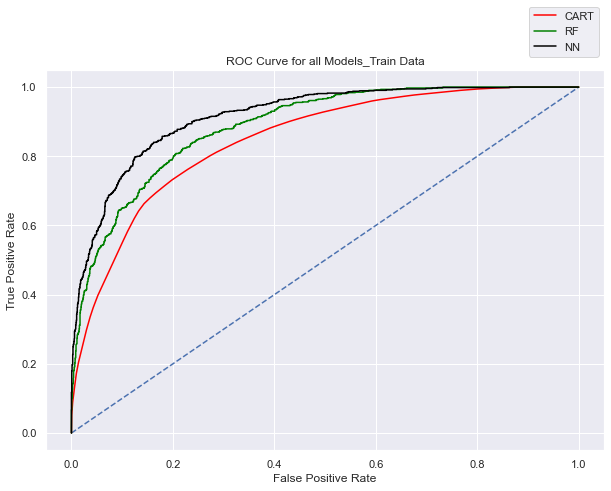

In [515]:
# Train:

print('Area under the curve for Decision Tree Classification Model is',
      round((roc_auc_score(y_train,Best_grid_DTC.predict_proba(X_train)[:,1])*100),3),'%')
print('Area under the curve for Random Forest Classification Model is',
      round((roc_auc_score(y_train,Best_grid_RFCL.predict_proba(X_train)[:,1])*100),3),'%')
print('Area under the curve for Artificial Neural Network Model is',
      round((roc_auc_score(y_train,Best_grid_NNCL.predict_proba(X_train_scaled)[:,1])*100),3),'%')
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--');
plt.plot(fpr_dtc_t, tpr_dtc_t,color='red',label="CART");
plt.plot(fpr_rfc_t, tpr_rfc_t,color='green',label="RF");
plt.plot(fpr_ann_t, tpr_ann_t,color='black',label="NN");
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for all Models_Train Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.show()

In [509]:
AUC_test_DT = roc_auc_score(y_test,Best_grid_DTC.predict_proba(X_test)[:,1])
AUC_test_RF = roc_auc_score(y_test,Best_grid_RFCL.predict_proba(X_test)[:,1])
AUC_test_NN = roc_auc_score(y_test,Best_grid_NNCL.predict_proba(X_test_scaled)[:,1])

Area under the curve for Decision Tree Classification Model is 80.472 %
Area under the curve for Random Forest Classification Model is 81.673 %
Area under the curve for Artificial Neural Network Model is 77.628 %


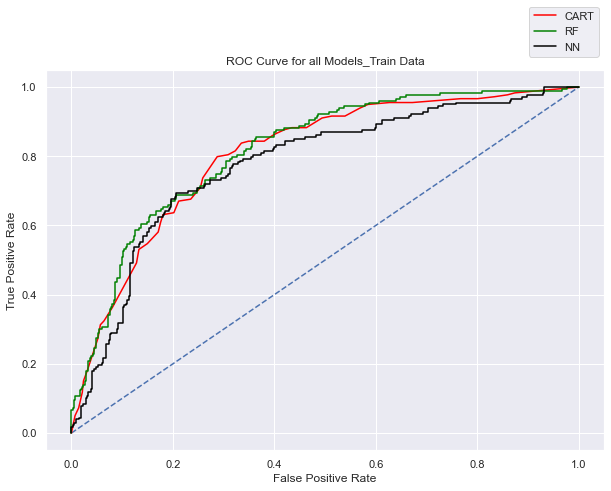

In [519]:
# Test:

print('Area under the curve for Decision Tree Classification Model is',
      round((roc_auc_score(y_test,Best_grid_DTC.predict_proba(X_test)[:,1])*100),3),'%')
print('Area under the curve for Random Forest Classification Model is',
      round((roc_auc_score(y_test,Best_grid_RFCL.predict_proba(X_test)[:,1])*100),3),'%')
print('Area under the curve for Artificial Neural Network Model is',
      round((roc_auc_score(y_test,Best_grid_NNCL.predict_proba(X_test_scaled)[:,1])*100),3),'%')
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--');
plt.plot(fpr_dtc, tpr_dtc,color='red',label="CART");
plt.plot(fpr_rfc, tpr_rfc,color='green',label="RF");
plt.plot(fpr_ann, tpr_ann,color='black',label="NN");
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for all Models_Train Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.show()

In [661]:
# Getting the Parameters for Cart Model - Train Data 

cart_train_metrics=classification_report(y_train, y_train_pre_DT,output_dict=True)
df_dt_train=pd.DataFrame(cart_train_metrics).transpose()

# (Not claimed)
Cart_train_precision_0 = df_dt_train.iloc[0][0]
Cart_train_recall_0 = df_dt_train.iloc[0][1]
Cart_train_f1_0 = df_dt_train.iloc[0][2]

# (claimed)
Cart_train_precision = df_dt_train.iloc[1][0]
Cart_train_recall = df_dt_train.iloc[1][1]
Cart_train_f1 = df_dt_train.iloc[1][2]
Cart_train_acc = df_dt_train.iloc[2][0]

In [677]:
# Getting the Parameters for Cart Model - Test Data

cart_test_metrics=classification_report(y_test, y_test_pre_DT,output_dict=True)
df_dt_test=pd.DataFrame(cart_test_metrics).transpose()

# (Not claimed)
Cart_test_precision_0 = df_dt_test.iloc[0][0]
Cart_test_recall_0 = df_dt_test.iloc[0][1]
Cart_test_f1_0 = df_dt_test.iloc[0][2]

# (claimed)
Cart_test_precision = df_dt_test.iloc[1][0]
Cart_test_recall = df_dt_test.iloc[1][1]
Cart_test_f1 = df_dt_test.iloc[1][2]
Cart_test_acc = df_dt_test.iloc[2][0]

In [678]:
# Getting the Parameters for RF Model - Train Data

RF_train_metrics=classification_report(y_train, y_train_pre_RF,output_dict=True)
df_RF_train=pd.DataFrame(RF_train_metrics).transpose()

# (Not claimed)
RF_train_precision_0 = df_RF_train.iloc[0][0]
RF_train_recall_0 = df_RF_train.iloc[0][1]
RF_train_f1_0 = df_RF_train.iloc[0][2]

# (claimed)
RF_train_precision = df_RF_train.iloc[1][0]
RF_train_recall = df_RF_train.iloc[1][1]
RF_train_f1 = df_RF_train.iloc[1][2]
RF_train_acc = df_RF_train.iloc[2][0]

In [679]:
# Getting the Parameters for RF Model - Test Data

RF_test_metrics=classification_report(y_test, y_test_pre_RF,output_dict=True)
df_RF_test=pd.DataFrame(RF_test_metrics).transpose()

# (Not claimed)
RF_test_precision_0 = df_RF_test.iloc[0][0]
RF_test_recall_0 = df_RF_test.iloc[0][1]
RF_test_f1_0 = df_RF_test.iloc[0][2]

# (claimed)
RF_test_precision = df_RF_test.iloc[1][0]
RF_test_recall = df_RF_test.iloc[1][1]
RF_test_f1 = df_RF_test.iloc[1][2]
RF_test_acc = df_RF_test.iloc[2][0]

In [680]:
# Getting the Parameters for NN Model - Train Data

NN_train_metrics=classification_report(y_train, y_train_pre_NN,output_dict=True)
df_NN_train=pd.DataFrame(NN_train_metrics).transpose()

# (Not claimed)
NN_train_precision_0 = df_NN_train.iloc[0][0]
NN_train_recall_0 = df_NN_train.iloc[0][1]
NN_train_f1_0 = df_NN_train.iloc[0][2]

# (claimed)
NN_train_precision = df_NN_train.iloc[1][0]
NN_train_recall = df_NN_train.iloc[1][1]
NN_train_f1 = df_NN_train.iloc[1][2]
NN_train_acc = df_NN_train.iloc[2][0]

In [681]:
NN_test_metrics=classification_report(y_test, y_test_pre_NN,output_dict=True)
df_NN_test=pd.DataFrame(NN_test_metrics).transpose()

# (Not claimed)
NN_test_precision_0 = df_NN_test.iloc[0][0]
NN_test_recall_0 = df_NN_test.iloc[0][1]
NN_test_f1_0 = df_NN_test.iloc[0][2]

# (claimed)
NN_test_precision = df_NN_test.iloc[1][0]
NN_test_recall = df_NN_test.iloc[1][1]
NN_test_f1 = df_NN_test.iloc[1][2]
NN_test_acc = df_NN_test.iloc[2][0]

In [728]:
# For Class : 0 ==> Not- Claimed

print('The model performance metric scores: Not-Claimed class')
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
Model_data = pd.DataFrame({'CART_Train':[Cart_train_acc,AUC_train_Dt,Cart_train_recall_0,Cart_train_precision_0,Cart_train_f1_0],
                           'CART_Test':[Cart_test_acc,AUC_test_DT,Cart_test_recall_0,Cart_test_precision_0,Cart_test_f1_0],
                           'RF_Train':[RF_train_acc,AUC_train_Rf,RF_train_recall_0,RF_train_precision_0,RF_train_f1_0],
                           'RF_Test':[RF_test_acc,AUC_test_RF,RF_test_recall_0,RF_test_precision_0,RF_test_f1_0],
                           'NN_Train':[NN_train_acc,AUC_train_Nn,NN_train_recall_0,NN_train_precision_0,NN_train_f1_0],
                           'NN_Test':[NN_test_acc,AUC_test_NN,NN_test_recall_0,NN_test_precision_0,NN_test_f1_0]},index=index)
                        
round(Model_data,4)*100

The model performance metric scores: Not-Claimed class


,CART_Train,CART_Test,RF_Train,RF_Test,NN_Train,NN_Test
Accuracy,79.75,75.50,82.17,78.33,85.08,76.83
AUC,84.73,80.47,88.72,81.67,91.61,77.63
Recall,86.77,82.90,90.88,87.65,89.73,84.09
Precision,84.32,82.31,84.45,82.55,88.76,83.10
F1 Score,85.53,82.60,87.54,85.02,89.24,83.59


In [675]:
# For Class : 1 ==> Claimed

print('The model performance metric scores: Claimed class')
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
Model_data = pd.DataFrame({'CART_Train':[Cart_train_acc,AUC_train_Dt,Cart_train_recall,Cart_train_precision,Cart_train_f1],
                           'CART_Test':[Cart_test_acc,AUC_test_DT,Cart_test_recall,Cart_test_precision,Cart_test_f1],
                           'RF_Train':[RF_train_acc,AUC_train_Rf,RF_train_recall,RF_train_precision,RF_train_f1],
                           'RF_Test':[RF_test_acc,AUC_test_RF,RF_test_recall,RF_test_precision,RF_test_f1],
                           'NN_Train':[NN_train_acc,AUC_train_Nn,NN_train_recall,NN_train_precision,NN_train_f1],
                           'NN_Test':[NN_test_acc,AUC_test_NN,NN_test_recall,NN_test_precision,NN_test_f1]},index=index)
                        
round(Model_data,4)*100

The model performance metric scores: Claimed class


,CART_Train,CART_Test,RF_Train,RF_Test,NN_Train,NN_Test
Accuracy,79.75,75.50,82.17,78.33,85.08,76.83
AUC,84.73,80.47,88.72,81.67,91.61,77.63
Recall,64.16,58.10,62.82,56.42,74.77,59.78
Precision,68.58,59.09,75.61,66.01,76.62,61.49
F1 Score,66.30,58.59,68.62,60.84,75.68,60.62


#### Train and Test Comparison within Models:
1. CART: The performance metric is reduced for Test data. The train data has good metrics but does no hold good on test data.
2. RF: The difference in accuracy rate between Train and Test is low. The AUC score is good over all other models. RF model is good on train and test data.
3. ANN: The difference in accuracy rate and AUC score between the train and test is high. Though the recall, precision and F1 score are similar to RF model, considering the steep fall between the accuracy and auc score, ANN model is not preferred.

#### Best Fit Model : Random Forest

1. The given data is classification type.
2. The Target or the dependent variable is Binary in nature. 
3. The accuracy score, AUC score and the ROC curve is favourable to Random forest.
4. The fall in accuracy score and AUC score between the Train and Test is high for NN model.
5. Precision: Considering Non-Claimed as Claimed. This will lead to the increase in frequncy of the claims without actually claiming.
6. Recall: Classifying Claimed observation as not-Claimed. 
7. In this case, Precision is equally important to Recall.
8. The model, Random forest has high Precision and comparatively equal recall values. 
9. Hence, Random Forest is used for further analysis.

#### Random Forest Classifier performed with Revised number of features and a single decision tree is randomly drawn out from the RF model:

In [317]:
pd.DataFrame(Best_grid_RFCL.feature_importances_,columns=['Imp'],
            index=X_train.columns).sort_values(['Imp'],ascending=False)

,Imp
Silver Plan,0.228710
Sales,0.180367
Duration,0.112617
Commision,0.094189
JZI,0.093765
Type,0.088767
Age,0.072001
Customised Plan,0.053997
Cancellation Plan,0.044962
Gold Plan,0.012717


In [574]:
rf_df_rev = df_model.copy()

In [575]:
# removing the least important features

rf_df_rev  = rf_df_rev.drop(['Americas','EUROPE','EPX','CWT','Channel'],axis=1)

In [576]:
X_rf = rf_df_rev .drop(['Claimed'],axis=1)

y_rf = rf_df_rev ['Claimed']

In [322]:
X_train_rf,X_test_rf,y_train_rf,y_test_rf = train_test_split(X_rf,y_rf,test_size=.20,random_state=123)

In [542]:
param_grid = {
    'max_depth': [10],## 9,10
    'max_features': [10],## 10,11,12
    'min_samples_leaf': [10,20,30],# 20,30
    'min_samples_split': [40,60,80], ## 60,70
    'n_estimators': [300] ## 100,200
}

RFCL_1 = RandomForestClassifier(random_state=123)

Grid_search_RFCL_1 = GridSearchCV(estimator = RFCL_1, param_grid = param_grid, cv = 3)

In [543]:
Grid_search_RFCL_1.fit(X_train_rf,y_train_rf)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_depth': [10], 'max_features': [10],
                         'min_samples_leaf': [10, 20, 30],
                         'min_samples_split': [40, 60, 80],
                         'n_estimators': [300]})

In [544]:
Best_grid_RFCL_1 = Grid_search_RFCL_1.best_estimator_

In [545]:
Grid_search_RFCL_1.best_params_

{'max_depth': 10,
 'max_features': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 40,
 'n_estimators': 300}

In [558]:
print(classification_report(y_train_rf,Best_grid_RFCL_1.predict(X_train_rf)))
rev_rf_acc_train = 0.82      
rev_rf_p_train =0.75      
rev_rf_r_train = 0.62      
rev_rf_f1_train=0.68       

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1655
           1       0.75      0.62      0.68       745

    accuracy                           0.82      2400
   macro avg       0.80      0.76      0.78      2400
weighted avg       0.81      0.82      0.81      2400



In [548]:
print(classification_report(y_test_rf,Best_grid_RFCL_1.predict(X_test_rf)))
rev_rf_acc_test = 0.78           
rev_rf_p_test =0.65        
rev_rf_r_test= 0.56        
rev_rf_f1_test=0.60       

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       421
           1       0.65      0.56      0.60       179

    accuracy                           0.78       600
   macro avg       0.74      0.72      0.72       600
weighted avg       0.77      0.78      0.77       600



In [553]:
Rev_AUC_train_RF = roc_auc_score(y_train_rf,Best_grid_RFCL_1.predict_proba(X_train_rf)[:,1])
Rev_AUC_test_RF = roc_auc_score(y_test_rf,Best_grid_RFCL_1.predict_proba(X_test_rf)[:,1])

In [730]:
print("Performance Evaluation metrics of Random Forest(Original) and Random Forest(Revised) ==> Claimed Class")

index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
Revised_Rf_metrics = pd.DataFrame({
    'RF_Train':[RF_train_acc,AUC_train_Rf,RF_traint_recall,RF_train_precision,RF_train_f1],
    'RF_Test':[RF_test_acc,AUC_test_RF,RF_test_recall,RF_test_precision,RF_test_f1],
    
    'Revised_RF_train':[rev_rf_acc_train,Rev_AUC_train_RF,rev_rf_r_train,rev_rf_p_train,rev_rf_f1_train],
                                  
    'Revised_RF_test':[rev_rf_acc_test,Rev_AUC_test_RF,rev_rf_r_test,rev_rf_p_test,rev_rf_f1_test]},index=index)


round((Revised_Rf_metrics*100))

Performance Evaluation metrics of Random Forest(Original) and Random Forest(Revised) ==> Claimed Class


,RF_Train,RF_Test,Revised_RF_train,Revised_RF_test
Accuracy,82.0,78.0,82.0,78.0
AUC,89.0,82.0,88.0,81.0
Recall,63.0,56.0,62.0,56.0
Precision,76.0,66.0,75.0,65.0
F1 Score,69.0,61.0,68.0,60.0


##### **No significant difference between the original Random forest model and the revised features random forest model

In [583]:
from sklearn.tree import export_graphviz

In [594]:
train_char_label = ['Not-Claimed','Claimed']

In [650]:
small_rf_rev = RandomForestClassifier(n_estimators = 300,random_state=123,max_depth=3,
                                  max_features='auto',min_samples_split=40,min_samples_leaf=10)
small_rf_rev.fit(X_train_rf,y_train_rf)
tree_rev = small_rf_rev.estimators_[10]

In [651]:
RF_tree_rev = open('RF_Tree_File2.dot','w')
dot_data1 = export_graphviz(tree_rev, 
                out_file='RF_Tree_File2.dot', 
                feature_names = list(X_train_rf), 
                class_names = list(train_char_label),
                rounded = True, proportion = False, 
                precision = 2, filled = True)
RF_tree_rev.close()

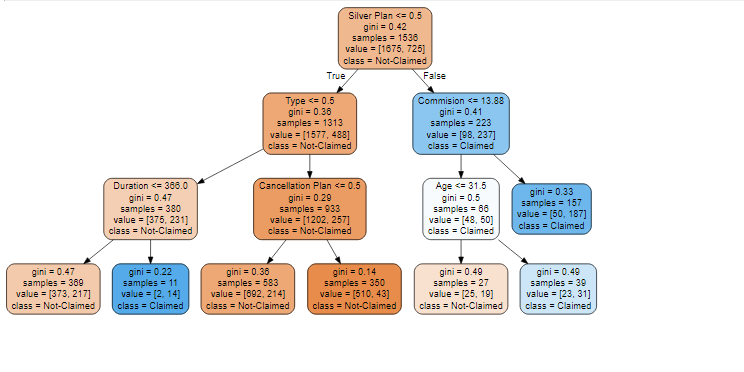

In [617]:
df_claimed = df[df['Claimed'] == 'Yes']

In [619]:
df_not_claimed = df[df['Claimed'] == 'No']

In [654]:
df_not_claimed[df_not_claimed['Commision'] <= 13.88].count()[0]

1677

In [659]:
df_claimed[df_claimed['Commision'] > 13.88].count()[0]

440

In [657]:
df_claimed['Commision'].count()

924


- Silver Plan: It has the lowest gini index hence, chosen as a decision node. The Silver plan under the Product name has highest number of claimed cases. The given business problem is about the higher claim frequency. The model has correctly captured the feature which caused high claims.
- Commission: 1677 observations with commission less than 13.88 have not claimed the policy. 
- Type: Among the Travel agency and Airlines, the travel tickets  booked through airlines have equal number of claimed and non claimed cases. 

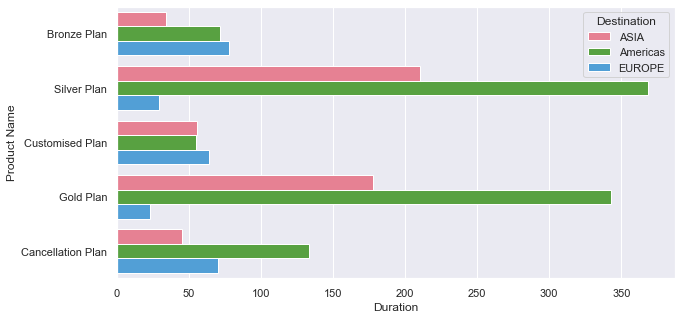

In [752]:
plt.figure(figsize=(10,5))
sns.barplot(x=df_claimed['Duration'],y=df_claimed['Product Name'],hue=df_claimed['Destination'],ci=None,palette='husl');


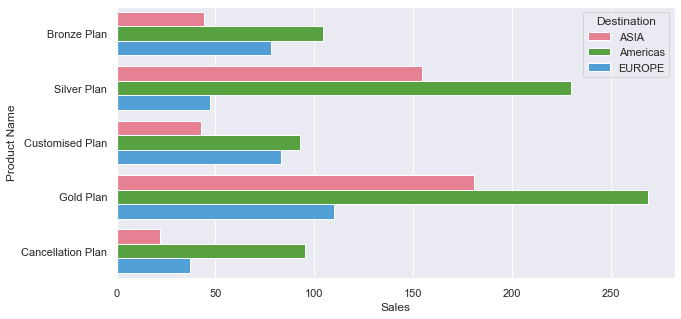

In [754]:
plt.figure(figsize=(10,5))
sns.barplot(x=df_claimed['Sales'],y=df_claimed['Product Name'],hue=df_claimed['Destination'],ci=None,palette='husl');

In [787]:
age_more_70 = df[df['Age'] > 70]

Text(0.5, 1.0, 'Percentage of Claimed cases for the Age group above 70')

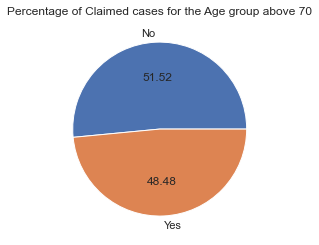

In [797]:
plt.pie(age_more_70['Claimed'].value_counts(normalize=True),
        labels = age_more_70['Claimed'].value_counts(normalize=True).index,autopct='%.2f');
plt.title('Percentage of Claimed cases for the Age group above 70')

In [789]:
age_less_70 = df[df['Age'] <= 70]

Text(0.5, 1.0, 'Percentage of Claimed cases for the Age group below 70')

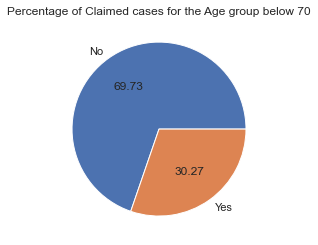

In [798]:
plt.pie(age_less_50['Claimed'].value_counts(normalize=True),
        labels = age_less_50['Claimed'].value_counts(normalize=True).index,autopct='%.2f');
plt.title('Percentage of Claimed cases for the Age group below 70')

### End